# **Improving Plot Aesthetics**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
women_degrees = pd.read_csv("data/percent-bachelors-degrees-women-usa.csv")
women_degrees.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


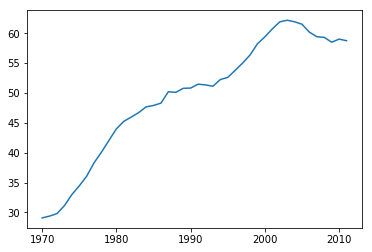

In [4]:
plt.plot(women_degrees["Year"], women_degrees["Biology"])
plt.show()

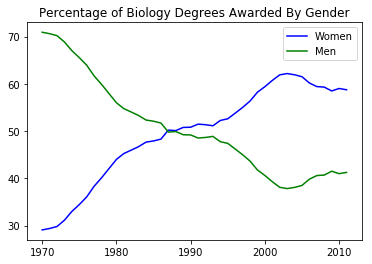

In [24]:
# Visualizing the Gender Gap
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

**Data-Ink Ratio**   
The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.  
  
Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as chartjunk, increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the data-ink ratio, which is the fractional amount of the plotting area dedicated to displaying the data.
  
The following is an animated GIF by Darkhorse Analytics that shows a series of tweaks for boosting the data-ink ratio:
  
  
<img src="http://cdn2.hubspot.net/hubfs/2020805/Imported_Blog_Media/data-ink.gif?t=1477583494534">
  
  
Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

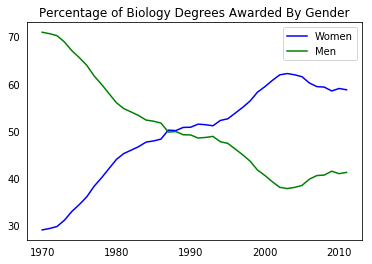

In [28]:
# Hiding Tick Marks
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.tick_params(bottom="off",top="off",left="off",right="off")
plt.show()

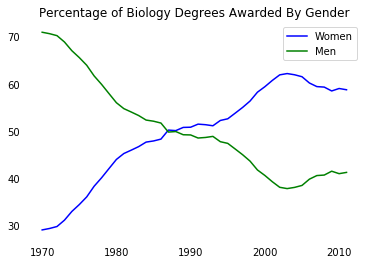

In [35]:
# Hiding Spines
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.tick_params(bottom="off",top="off",left="off",right="off")
# this way:
#ax.spines["right"].set_visible(False)
# or:
for key,spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

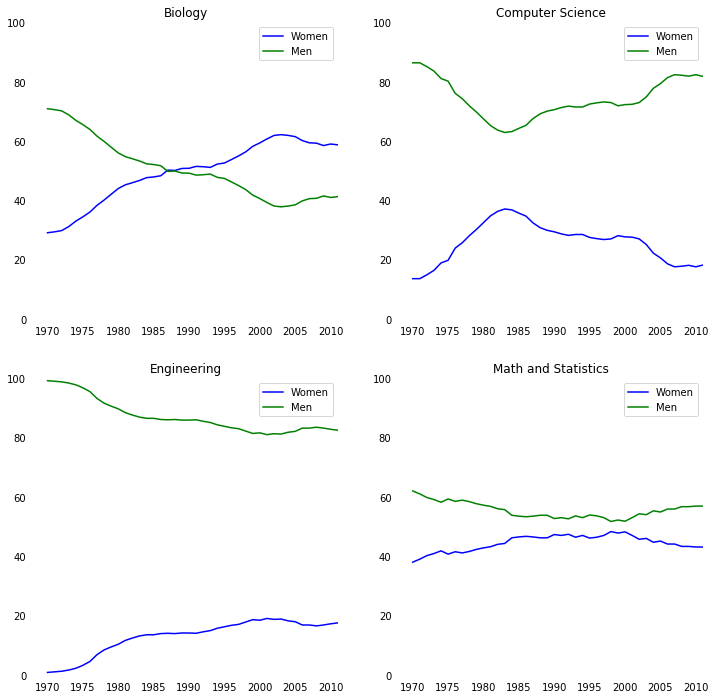

In [58]:
# Comparing Gender Gap Across Degree Categories
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.legend(loc='upper right')
    ax.set_title(major_cats[sp])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom="off",top="off",left="off",right="off")
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    
plt.show()

# **Color, Layout, and Annotations**

**Color**  
  
Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.  
When selecting colors, we need to be mindful of people who have some amount of color blindness. 
  
The [Ishihara test](https://en.wikipedia.org/wiki/Ishihara_test) is a well known test for color blindness, where the person is asked to identify the number in the following image:  
  
<img src="https://s3.amazonaws.com/dq-content/ishihara_test.png">
  
If we wanted to publish the data visualizations we create, we need to be mindful of color blindness. Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called Color Blind 10 and was released by Tableau, the company that makes the data visualization platform of the same name. Navigate to [this page](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) and select just the Color Blind 10 option from the list of palettes to see the ten colors included in the palette.

**Setting Line Color Using RGB**  
  
The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. You'll notice that next to each color strip are three integer values, separated by periods (.):
<img src="https://s3.amazonaws.com/dq-content/tableau_rgb_values.png">
  
To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255). In the following code, we scale the first color, which resembles dark blue, in the Color Blind 10 palette and set it as the line color:  

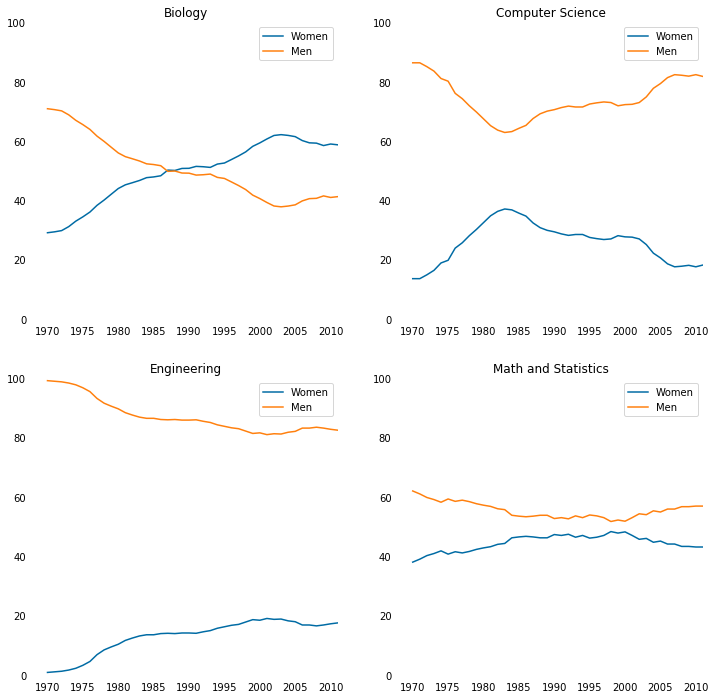

In [74]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize=(12, 12))
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.legend(loc='upper right')
plt.show()

**Setting Line Width**  
  
By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

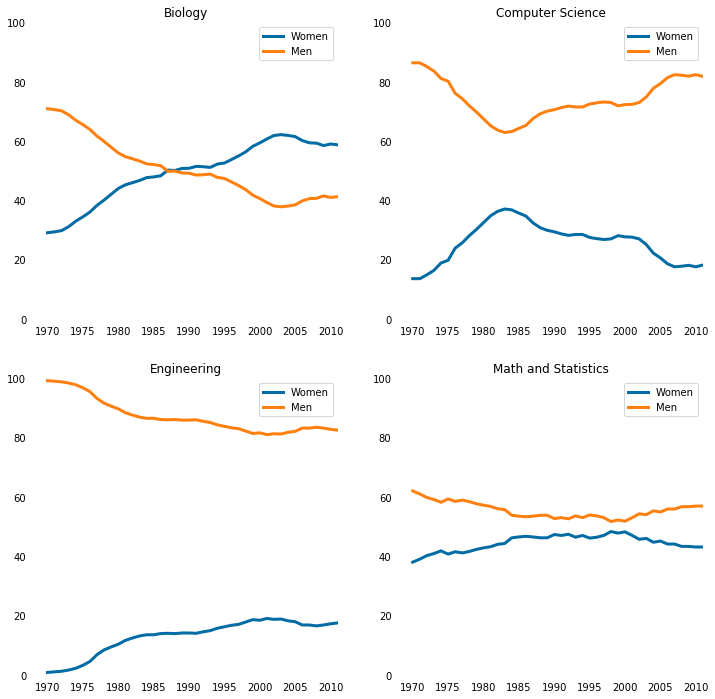

In [76]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)

fig = plt.figure(figsize=(12, 12))
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Line Width
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.legend(loc='upper right')
plt.show()

**Improve the Layout and Ordering**  
  
So far, we've been generating our line charts on a 2 by 2 subplot grid. If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

To make the viewing experience more coherent, we can:

- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

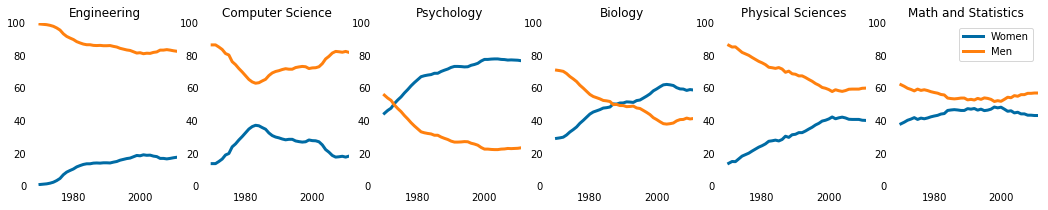

In [80]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

**Replacing the Legend with Annotations**  
  
The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders:

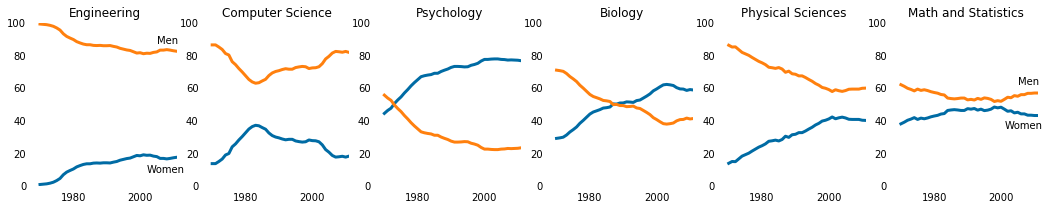

In [86]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    # Annotations on just the leftmost and rightmost charts
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
    
plt.show()